In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
max_pixel = 255.0

In [14]:
original_image = cv2.imread("Images/me.jpg")

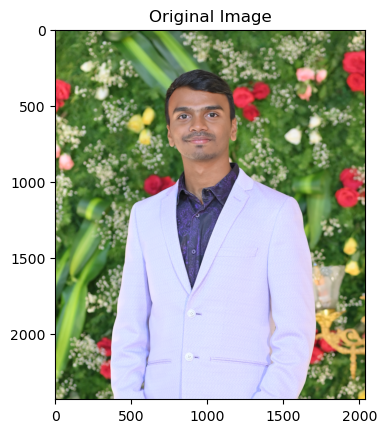

In [15]:
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

In [22]:
ksize = (12, 12)
blurred_image = cv2.blur(original_image, ksize)

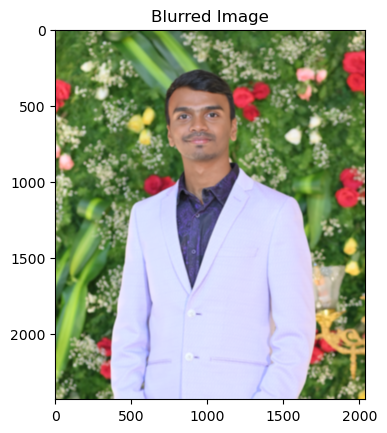

In [23]:
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")
plt.show()

In [24]:
# Generate random Gaussian noise
mean = 0
stddev = 180
noise = np.zeros(blurred_image.shape, np.uint8)
cv2.randn(noise, mean, stddev)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 30,   0,   0],
        [  0,   0,   0]],

       [[ 65,   0,   0],
        [ 32,   0,   0],
        [ 90,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [ 60,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 93,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [ 55,   0,   0],
        [ 19,   0,   0],
        ...,
        [216,   0,   0],
        [109,   0,   0],
        [  7,   0,   0]],

       [[134,   0,   0],
        [ 11,   0,   0],
        [128,   0,   0],
        ...,
        [251,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

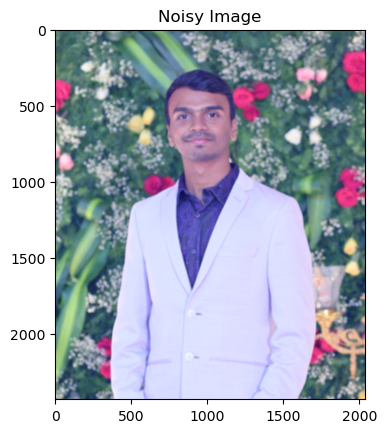

In [25]:
noisy_image = cv2.add(blurred_image, noise)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.show()

In [26]:
cv2.imwrite('Images/degraded-image.jp2', noisy_image, [int(cv2.IMWRITE_JPEG2000_COMPRESSION_X1000), 70])

True

In [27]:
degraded_image = cv2.imread("Images/degraded-image.jp2")

In [28]:
mse = np.mean((original_image - degraded_image)**2)
print(f"MSE = {mse}")

MSE = 43.840514363509016


In [29]:
psnr = 20 * np.log10(max_pixel/np.sqrt(mse))
print(f"PSNR = {psnr} dB")

PSNR = 31.71204719955393 dB
